In [98]:
from diagrams.c4 import Person, Container, Database, System
from diagrams.custom import Custom
from urllib.request import urlretrieve
from IPython.display import display, Markdown

class SevenftNode():
  def __init__(self, nodeType):
    self.nodeType = nodeType
    self.instance = None

  @staticmethod
  def metadata(args = {}):
    def _metadata(func):
        func.metadata = args or {}
        func.metadata.setdefault('name', "Name missing")
        func.metadata.setdefault('description', "")
        return func
    return _metadata
  
  @staticmethod
  def GetIcon(name, url):
    try:
        urlretrieve(url, name)
    except:
        try:
          urlretrieve("https://cdn-icons-png.flaticon.com/512/10448/10448063.png", name)
        except:
          pass
    return name
  
  @staticmethod
  def FormatLabel(name, key, description):
    title = f'<font point-size="12"><b>{name}</b></font><br/>'
    subtitle = f'<font point-size="9">[{key}]<br/></font>' if key else ""
    text = f'<br/><font point-size="10">{description}</font>' if description else ""
    return f"<{title}{subtitle}{text}>"

  def Print(self):
    if (self.metadata != None) and (isinstance(self.metadata, type({}))):
      display(Markdown('---'))
      display(Markdown('## ' + self.__class__.__name__))

      if len(self.metadata.items()) > 0:
        table = """| Key         | Value       | 
                   | ----------- | ----------- |"""
        for k, v in self.metadata.items():
          table = table + "\n| " + k + " | " + (v if isinstance(v, str) else str(v)) + " |"
        display(Markdown(table))

  def Get(self):
    md = self.metadata.copy()
    if (self.instance == None): 
      match self.nodeType:
        case "Container":
          md.setdefault('technology', "Technology missing")
          self.instance = Container( md.pop('name'), md.pop('technology'), md.pop('description'), **md )
        case "Person":
          md.setdefault('external', False)
          self.instance = Person( md.pop('name'), md.pop('description'), md.pop('external'), **md )
        case "Custom":
          md.setdefault('icon_path', "Icon path missing")
          self.instance = Custom( md.pop('name'), md.pop('icon_path'), **md)
        case "Database":
          md.setdefault('technology', "Technology missing")
          self.instance = Database( md.pop('name'), md.pop('technology'), md.pop('description'), **md )
        #case "System":
        case _:
          md.setdefault('external', False)
          self.instance = System( md.pop('name'), md.pop('description'), md.pop('external'), **md )
    return self.instance

In [99]:
#@title Repository

#@markdown + Disc (Disc)
@SevenftNode.metadata({
    "name": "Disc", 
    "technology": "IBMi", 
    "description": "http://ddafsd/dsf",
    "icon_path": SevenftNode.GetIcon("NewRelic.png", "https://icons/NewRelic.png"),
    "one": "two"
})
class Disc(SevenftNode): 
  def __init__(self):
    SevenftNode.__init__(self, "Custom")

In [101]:
#@title Reflected Repository
import sys, inspect
   
for cls in inspect.getmembers(sys.modules[__name__], inspect.isclass):
  try:
    eval(cls[0] + '()').Print()
  except:
    pass


---

## Disc

| Key         | Value       | 
                   | ----------- | ----------- |
| name | Disc |
| technology | IBMi |
| description | http://ddafsd/dsf |
| icon_path | NewRelic.png |
| one | two |

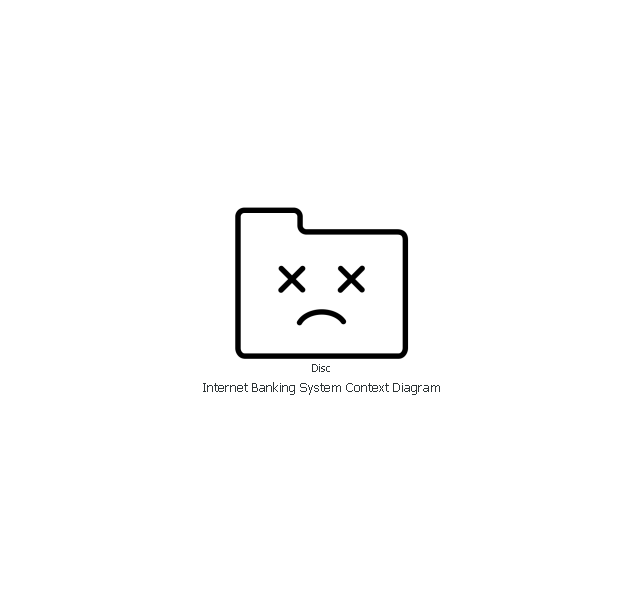

In [100]:
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship

with Diagram(**{
  "name": "Internet Banking System Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": {
    "splines": "spline",
    "fontsize": "10",
    "bgcolor": "transparent"
  },
  "node_attr": {
    "fontsize": "8px",
    "width": "1.8"
  }
}) as demo:

  customer = Disc().Get()

demo